<a href="https://colab.research.google.com/github/minshyee/CP1/blob/main/DepressionDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/AIBootCamp/cp1

/content/drive/MyDrive/AIBootCamp/cp1


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
origin = pd.read_csv('Suicide_Detection.csv')
origin.drop('Unnamed: 0', axis=1, inplace=True)
origin

,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,Am I weird I don't get affected by compliments...,non-suicide
2,Finally 2020 is almost over... So I can never ...,non-suicide
3,i need helpjust help me im crying so hard,suicide
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide
...,...,...
232069,If you don't like rock then your not going to ...,non-suicide
232070,You how you can tell i have so many friends an...,non-suicide
232071,pee probably tastes like salty tea😏💦‼️ can som...,non-suicide
232072,The usual stuff you find hereI'm not posting t...,suicide


In [6]:
df = origin.copy()

## Data preprocessing

- class 숫자로 바꾸기

In [14]:
df['class'] = df['class'].map(lambda x: 0 if 'non' in x else 1)
df

,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,1
1,Am I weird I don't get affected by compliments...,0
2,Finally 2020 is almost over... So I can never ...,0
3,i need helpjust help me im crying so hard,1
4,"I’m so lostHello, my name is Adam (16) and I’v...",1
...,...,...
232069,If you don't like rock then your not going to ...,0
232070,You how you can tell i have so many friends an...,0
232071,pee probably tastes like salty tea😏💦‼️ can som...,0
232072,The usual stuff you find hereI'm not posting t...,1


In [103]:
df.isnull().sum()

text     0
class    0
dtype: int64

In [15]:
df['class'].value_counts() 

1    116037
0    116037
Name: class, dtype: int64

In [13]:
fig = px.pie(df, values=df['class'].value_counts(), color=df['class'].unique(), color_discrete_map={'suicide':'#C62828', 'non-suicide': '#E0E0E0'}, title='Target Feature Ratio', names=df['class'].unique())
fig.show()

## data preprocessing


In [16]:
!pip install neattext

     |████████████████████████████████| 114 kB 5.1 MB/s 


In [49]:
import neattext.functions as ntf
from tqdm import tqdm # 진행률 트랙킹

#### nt 성능 확인 

In [48]:
import neattext as nt
t = df.text[232071]
t

'pee probably tastes like salty tea😏💦‼️ can someone who drank pee before confirm this🙄‼️'

In [43]:

doc = nt.TextCleaner()
doc.text = df['text'][0]
doc.remove_emojis().text
doc.remove_special_characters()

TextCleaner(text="Ex Wife Threatening SuicideRecently I left my wife for good because she has cheated on me twice and lied to me so much that I have decided to refuse to go back to her As of a few days ago she began threatening suicide I have tirelessly spent these paat few days talking her out of it and she keeps hesitating because she wants to believe Ill come back I know a lot of people will threaten this in order to get their way but what happens if she really does What do I do and how am I supposed to handle her death on my hands I still love my wife but I cannot deal with getting cheated on again and constantly feeling insecure Im worried today may be the day she does it and I hope so much it doesnt happen")

In [57]:
docx = nt.TextFrame(t)
docx.describe()

Key      Value          
Length  : 87             
vowels  : 26             
consonants: 41             
stopwords: 4              
punctuations: 0              
special_char: 0              
tokens(whitespace): 14             
tokens(words): 15             


In [60]:
docx.remove_special_characters()
docx.remove_stopwords('en')

TextFrame(text="pee probably tastes like salty tea drank pee confirm")

## clean_Text

In [78]:
def cleaning(text):
  text_length=[]
  cleaned_text=[]
  idx = 0 # 개수 보기위해서
  
  for i in tqdm(text):
    idx += 1
    i=i.lower()
    # c = ntf.count_stopwords(i)
    # print(f'현재 {idx} 의 불용어 수',c)
    i = ntf.remove_special_characters(i)
    i = ntf.remove_stopwords(i)
    text_length.append(len(i.split()))
    cleaned_text.append(i)
  return cleaned_text,text_length


In [53]:
clean_t, clean_leng = cleaning(df['text'])

100%|██████████| 232074/232074 [00:15<00:00, 14772.36it/s]


In [109]:
clean_df = pd.DataFrame({'text' : clean_t, 'leng' : clean_leng}).reset_index(drop=True)

In [111]:
clean_df['target'] = df['class']
clean_df

,text,leng,target
0,ex wife threatening suiciderecently left wife ...,54,1
1,weird dont affected compliments coming know ir...,11,0
2,finally 2020 hear 2020 bad year swear fucking ...,10,0
3,need helpjust help im crying hard,6,1
4,im losthello adam 16 ive struggling years im a...,199,1
...,...,...,...
232069,dont like rock going httpsmusictastespacematch...,5,0
232070,tell friends lonely deprived prebought little ...,12,0
232071,pee probably tastes like salty tea drank pee c...,9,0
232072,usual stuff find hereim posting sympathy pity ...,122,1


#### stopwords 비교

In [62]:
import nltk 
nltk.download('stopwords')

from nltk.corpus import stopwords
print(len(stopwords.words('english')))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
179


In [61]:
STOPWORDS_en = {'a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'ain', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amount', 'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'aren', "aren't", 'around', 'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'both', 'bottom', 'but', 'by', 'ca', 'call', 'can', 'cannot', 'could', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'done', 'down', 'due', 'during', 'each', 'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'even', 'ever', 'every', 'everyone', 'everything', 'everywhere', 'except', 'few', 'fifteen', 'fifty', 'first', 'five', 'for', 'former', 'formerly', 'forty', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'hence', 'her', 'here', 'hereafter', 'hereby', 'herein', 'hereupon', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'however', 'hundred', 'i', 'if', 'in', 'indeed', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'keep', 'last', 'latter', 'latterly', 'least', 'less', 'll', 'm', 'ma', 'made', 'make', 'many', 'may', 'me', 'meanwhile', 'might', 'mightn', "mightn't", 'mine', 'more', 'moreover', 'most', 'mostly', 'move', 'much', 'must', 'mustn', "mustn't", 'my', 'myself', 'name', 'namely', 'needn', "needn't", 'neither', 'never', 'nevertheless', 'next', 'nine', 'no', 'nobody', 'none', 'noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'o', 'of', 'off', 'often', 'on', 'once', 'one', 'only', 'onto', 'or', 'other', 'others', 'otherwise', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 'part', 'per', 'perhaps', 'please', 'put', 'quite', 'rather', 're', 'really', 'regarding', 's', 'same', 'say', 'see', 'seem', 'seemed', 'seeming', 'seems', 'serious', 'several', 'shan', "shan't", 'she', "she's", 'should', "should've", 'shouldn', "shouldn't", 'show', 'side', 'since', 'six', 'sixty', 'so', 'some', 'somehow', 'someone', 'something', 'sometime', 'sometimes', 'somewhere', 'still', 'such', 't', 'take', 'ten', 'than', 'that', "that'll", 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'thence', 'there', 'thereafter', 'thereby', 'therefore', 'therein', 'thereupon', 'these', 'they', 'third', 'this', 'those', 'though', 'three', 'through', 'throughout', 'thru', 'thus', 'to', 'together', 'too', 'top', 'toward', 'towards', 'twelve', 'twenty', 'two', 'under', 'unless', 'until', 'up', 'upon', 'us', 'used', 'using', 'various', 've', 'very', 'via', 'was', 'wasn', "wasn't", 'we', 'well', 'were', 'weren', "weren't", 'what', 'whatever', 'when', 'whence', 'whenever', 'where', 'whereafter', 'whereas', 'whereby', 'wherein', 'whereupon', 'wherever', 'whether', 'which', 'while', 'whither', 'who', 'whoever', 'whole', 'whom', 'whose', 'why', 'will', 'with', 'within', 'without', 'won', "won't", 'would', 'wouldn', "wouldn't", 'y', 'yet', 'you', "you'd", "you'll", "you're", "you've", 'your', 'yours', 'yourself', 'yourselves'}
len(STOPWORDS_en)

361

In [55]:
clean_t[232071]

'pee probably tastes like salty tea drank pee confirm'

## data split


In [86]:
max(clean_df.leng)

5717

In [105]:
clean_df.isnull().sum()

text      0
leng      0
target    0
dtype: int64

In [108]:
from sklearn.model_selection import train_test_split

In [114]:
train_data,test_data=train_test_split(clean_df,test_size=0.2,random_state=42)
train_data.shape, test_data.shape

train_X = train_data.drop('target', axis=1)
train_y = train_data['target']
test_X = test_data.drop('target', axis=1)
test_y = test_data['target']

train_X, train_y

(                                                     text  leng
 103752  going kill sooni dont know know body mind comp...    41
 208014  sub diary day 68 today great school stuff basi...    22
 220765  supposed doive got problem years antisocial da...   109
 116840  hey yes need help new subreddit ground subredd...    23
 149067  non trans gender dysphoria like menstruation e...    55
 ...                                                   ...   ...
 119879  found combo steve minecraft forgot save vault ...    19
 103694  hate admit california texas similar loyalty yo...    35
 131932       people online 20000 horny mf time whats guys     8
 146867  fuck chemistry man gotta study thing wanna lif...    10
 121958  reeses wrapper ground pocket things like convi...     9
 
 [185659 rows x 2 columns], 103752    1
 208014    0
 220765    1
 116840    0
 149067    0
          ..
 119879    0
 103694    0
 131932    0
 146867    0
 121958    0
 Name: target, Length: 185659, dtype: int64)

## visualization

In [84]:
fig = px.pie(df, values=train_data['target'].value_counts(), color=train_data['target'].unique(), color_discrete_map={1:'#C62828', 0: '#E0E0E0'}, title='Target Feature Ratio', names=train_data['target'].unique())
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



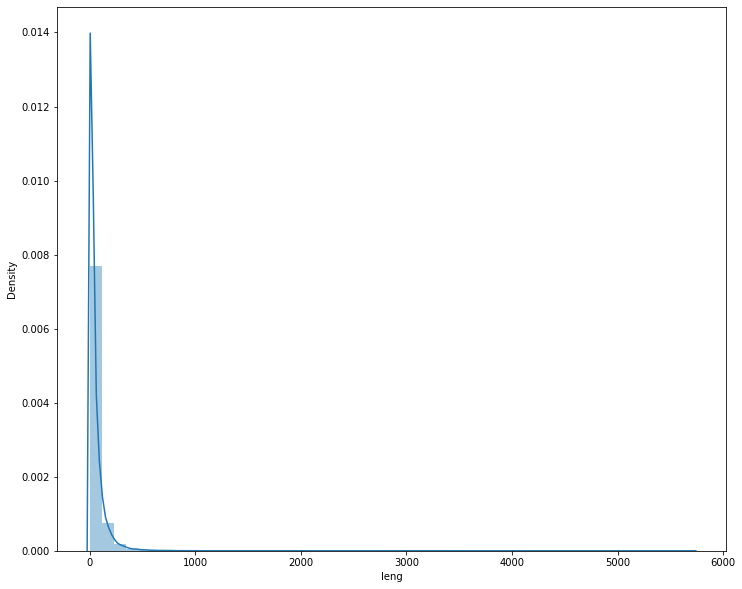

In [117]:
plt.figure(figsize=(12,10))
sns.distplot(train_X.leng)
plt.show()

## Tokenize

In [118]:
# 단어 단위로 나누기
from nltk.tokenize import word_tokenize
def tokenize(text):
  tokens = []
  for i in tqdm(text):
    tokens.append(word_tokenize(i))
  return tokens

In [205]:
# nltk.download('punkt')
tokens = tokenize(train_X.text)
tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


100%|██████████| 185659/185659 [01:16<00:00, 2434.79it/s]


[['going',
  'kill',
  'sooni',
  'dont',
  'know',
  'know',
  'body',
  'mind',
  'completely',
  'sync',
  'ive',
  'convinced',
  'im',
  'going',
  'commit',
  'brain',
  'screamed',
  'id',
  'fucking',
  'kick',
  'chair',
  'im',
  'fucking',
  'nauseated',
  'cant',
  'stand',
  'cant',
  'stand',
  'breate',
  'second',
  'longer',
  'cant',
  'stand',
  'trapped',
  'body',
  'brain',
  'fucking',
  'thoughts',
  'need',
  'talk',
  'talk'],
 ['sub',
  'diary',
  'day',
  '68',
  'today',
  'great',
  'school',
  'stuff',
  'basically',
  'talked',
  'riot',
  'happened',
  'state',
  'left',
  'school',
  'early',
  'meetings',
  'started',
  '9',
  'finished',
  '7',
  'day'],
 ['supposed',
  'doive',
  'got',
  'problem',
  'years',
  'antisocial',
  'daily',
  'interactions',
  'people',
  'job',
  'quit',
  'job',
  'couldnt',
  'deal',
  'death',
  'threats',
  'negative',
  'corner',
  'punching',
  'bag',
  'employees',
  'customers',
  'job',
  'went',
  'extensive'

In [206]:
cdf = train_X.copy()

## 불용어 추가 하기


In [254]:
new_stopwords = ["im", "dont", "ive", "cant", "on", "didnt", "ur", "na"]
stpwrd = nltk.corpus.stopwords.words('english')
stpwrd.extend(new_stopwords)
print(stpwrd)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [255]:
removing_custom_words = [[words for words in doc if not words in stpwrd] for doc in tokens ]
removing_custom_words[0]

['going',
 'kill',
 'sooni',
 'know',
 'know',
 'body',
 'mind',
 'completely',
 'sync',
 'convinced',
 'going',
 'commit',
 'brain',
 'screamed',
 'id',
 'fucking',
 'kick',
 'chair',
 'fucking',
 'nauseated',
 'stand',
 'stand',
 'breate',
 'second',
 'longer',
 'stand',
 'trapped',
 'body',
 'brain',
 'fucking',
 'thoughts',
 'need',
 'talk',
 'talk']

In [256]:
cdf['tokens'] = removing_custom_words
cdf

,text,leng,tokens
103752,going kill sooni dont know know body mind comp...,41,"[going, kill, sooni, know, know, body, mind, c..."
208014,sub diary day 68 today great school stuff basi...,22,"[sub, diary, day, 68, today, great, school, st..."
220765,supposed doive got problem years antisocial da...,109,"[supposed, doive, got, problem, years, antisoc..."
116840,hey yes need help new subreddit ground subredd...,23,"[hey, yes, need, help, new, subreddit, ground,..."
149067,non trans gender dysphoria like menstruation e...,55,"[non, trans, gender, dysphoria, like, menstrua..."
...,...,...,...
119879,found combo steve minecraft forgot save vault ...,19,"[found, combo, steve, minecraft, forgot, save,..."
103694,hate admit california texas similar loyalty yo...,35,"[hate, admit, california, texas, similar, loya..."
131932,people online 20000 horny mf time whats guys,8,"[people, online, 20000, horny, mf, time, whats..."
146867,fuck chemistry man gotta study thing wanna lif...,10,"[fuck, chemistry, man, got, ta, study, thing, ..."


## 실험: 자살과 비자살 사이 리뷰의 단어 감성

In [257]:
tar = list(train_y)

In [258]:
ex = cdf.copy()
ex['target'] = tar
ex

,text,leng,tokens,target
103752,going kill sooni dont know know body mind comp...,41,"[going, kill, sooni, know, know, body, mind, c...",1
208014,sub diary day 68 today great school stuff basi...,22,"[sub, diary, day, 68, today, great, school, st...",0
220765,supposed doive got problem years antisocial da...,109,"[supposed, doive, got, problem, years, antisoc...",1
116840,hey yes need help new subreddit ground subredd...,23,"[hey, yes, need, help, new, subreddit, ground,...",0
149067,non trans gender dysphoria like menstruation e...,55,"[non, trans, gender, dysphoria, like, menstrua...",0
...,...,...,...,...
119879,found combo steve minecraft forgot save vault ...,19,"[found, combo, steve, minecraft, forgot, save,...",0
103694,hate admit california texas similar loyalty yo...,35,"[hate, admit, california, texas, similar, loya...",0
131932,people online 20000 horny mf time whats guys,8,"[people, online, 20000, horny, mf, time, whats...",0
146867,fuck chemistry man gotta study thing wanna lif...,10,"[fuck, chemistry, man, got, ta, study, thing, ...",0


In [259]:
ex_sui = ex[ex.target == 1]
ex_non = ex[ex.target == 0]
ex_sui.shape, ex_non.shape

((92909, 4), (92750, 4))

In [260]:
from collections import Counter

# Counter 객체는 리스트요소의 값과 요소의 갯수를 카운트 하여 저장하고 있습니다.
# 카운터 객체는 .update 메소드로 계속 업데이트 가능합니다.
word_counts = Counter()

# 토큰화된 각 리뷰 리스트를 카운터 객체에 업데이트 합니다. 
cdf['tokens'].apply(lambda x: word_counts.update(x))

# 가장 많이 존재하는 단어 순으로 10개를 나열합니다
word_counts.most_common(10)

[('like', 144424),
 ('want', 119519),
 ('know', 104463),
 ('feel', 97903),
 ('life', 93692),
 ('people', 73812),
 ('time', 67703),
 ('think', 57349),
 ('going', 53865),
 ('friends', 48408)]

In [261]:
from collections import Counter

# Counter 객체는 리스트요소의 값과 요소의 갯수를 카운트 하여 저장하고 있습니다.
# 카운터 객체는 .update 메소드로 계속 업데이트 가능합니다.

def word_cnt(docs):
  """ 토큰화된 문서 입력 -> 토큰 카운트
  Args:
        docs (series or list): 토큰화된 문서가 들어있는 list
  Returns:
        list: Dataframe
  """

  # 전체 코퍼스에서 단어 빈도 카운트
  word_counts = Counter()

  # 단어가 존재하는 문서의 빈도 카운트
  word_in_docs = Counter()

  total_docs = len(docs)
  
  for doc in docs:
    word_counts.update(doc)
    word_in_docs.update(set(doc))
  
  temp = zip(word_counts.keys(), word_counts.values())

  wc = pd.DataFrame(temp, columns = ['word', 'count'])

  # 단어의 순위
  # method='first': 같은 값의 경우 먼저나온 요소를 우선
  wc['rank'] = wc['count'].rank(method='first', ascending=False)
  total = wc['count'].sum()

  # 코퍼스 내 단어의 비율
  wc['percent'] = wc['count'].apply(lambda x: x / total)

  wc = wc.sort_values(by='rank')

  # 누적 비율
  # cumsum() : cumulative sum
  wc['cul_percent'] = wc['percent'].cumsum()

  temp2 = zip(word_in_docs.keys(), word_in_docs.values())
  ac = pd.DataFrame(temp2, columns=['word', 'word_in_docs'])
  wc = ac.merge(wc, on='word')
  
  # 전체 문서 중 존재하는 비율
  wc['word_in_docs_percent'] = wc['word_in_docs'].apply(lambda x: x / total_docs)

  return wc.sort_values(by='rank')


In [262]:
wc_sui = word_cnt(ex_sui['tokens'])
wc_non = word_cnt(ex_non['tokens'])

In [268]:
wc_sui.head(30)

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
56,like,45013,104913,1.0,0.014695,0.014695,0.484485
185,want,46694,103102,2.0,0.014441,0.029136,0.502578
96,life,42015,86575,3.0,0.012126,0.041262,0.452217
223,feel,39641,86283,4.0,0.012085,0.053348,0.426665
2,know,41626,84809,5.0,0.011879,0.065227,0.448030
45,people,29222,56699,6.0,0.007942,0.073168,0.314523
130,time,30515,54750,7.0,0.007669,0.080837,0.328440
230,think,28238,45955,8.0,0.006437,0.087274,0.303932
5,going,28582,45607,9.0,0.006388,0.093662,0.307634
660,friends,23649,38452,10.0,0.005386,0.099048,0.254539


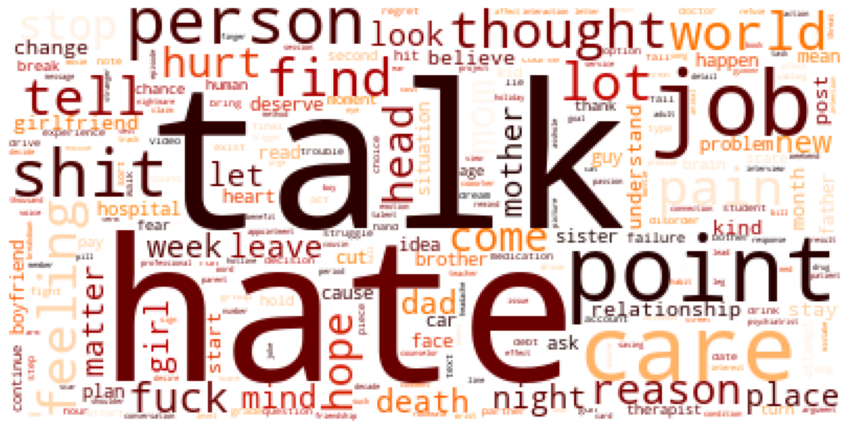

In [272]:
feature_names=wc_sui['word'].values
wcloud=WordCloud(max_words=400, background_color='white',colormap = 'gist_heat')
wcloud.generate(' '.join(word for word in feature_names[30:3000]))
plt.figure(figsize=(15,15))
plt.axis('off')
plt.imshow(wcloud)

In [269]:
wc_non.head(30)

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
164,filler,2085,46714,1.0,0.019457,0.019457,0.022480
58,like,23704,39511,2.0,0.016457,0.035914,0.255569
142,know,13736,19654,3.0,0.008186,0.044100,0.148097
62,fuck,4328,17440,4.0,0.007264,0.051364,0.046663
88,people,11257,17113,5.0,0.007128,0.058492,0.121369
33,want,11611,16417,6.0,0.006838,0.065330,0.125186
284,time,9405,12953,7.0,0.005395,0.070725,0.101402
138,got,9234,12320,8.0,0.005131,0.075856,0.099558
148,feel,7960,11620,9.0,0.004840,0.080696,0.085822
4,day,8246,11465,10.0,0.004775,0.085471,0.088906


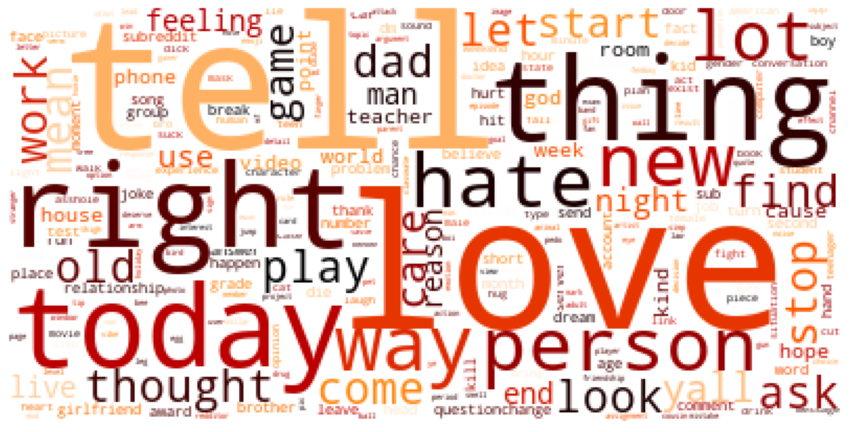

In [271]:
feature_names=wc_non['word'].values
wcloud=WordCloud(max_words=400, background_color='white',colormap = 'gist_heat')
wcloud.generate(' '.join(word for word in feature_names[30:3000]))
plt.figure(figsize=(15,15))
plt.axis('off')
plt.imshow(wcloud)

## 전체 단어 현황 파악


In [212]:
wc = word_cnt(cdf['tokens'])
wc.head(50)

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
74,like,68717,144424,1.0,0.015037,0.015037,0.370125
137,want,58305,119519,2.0,0.012444,0.027481,0.314043
2,know,55362,104463,3.0,0.010876,0.038357,0.298192
352,feel,47601,97903,4.0,0.010193,0.048551,0.256389
114,life,47301,93692,5.0,0.009755,0.058306,0.254774
63,people,40479,73812,6.0,0.007685,0.065991,0.218029
212,time,39920,67703,7.0,0.007049,0.073040,0.215018
359,think,36985,57349,8.0,0.005971,0.079011,0.199209
5,going,34990,53865,9.0,0.005608,0.084619,0.188464
963,friends,30273,48408,10.0,0.005040,0.089659,0.163057


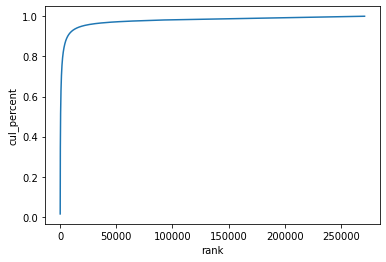

In [213]:
import seaborn as sns

sns.lineplot(x='rank', y='cul_percent', data=wc);

### 상위 단어 시각화

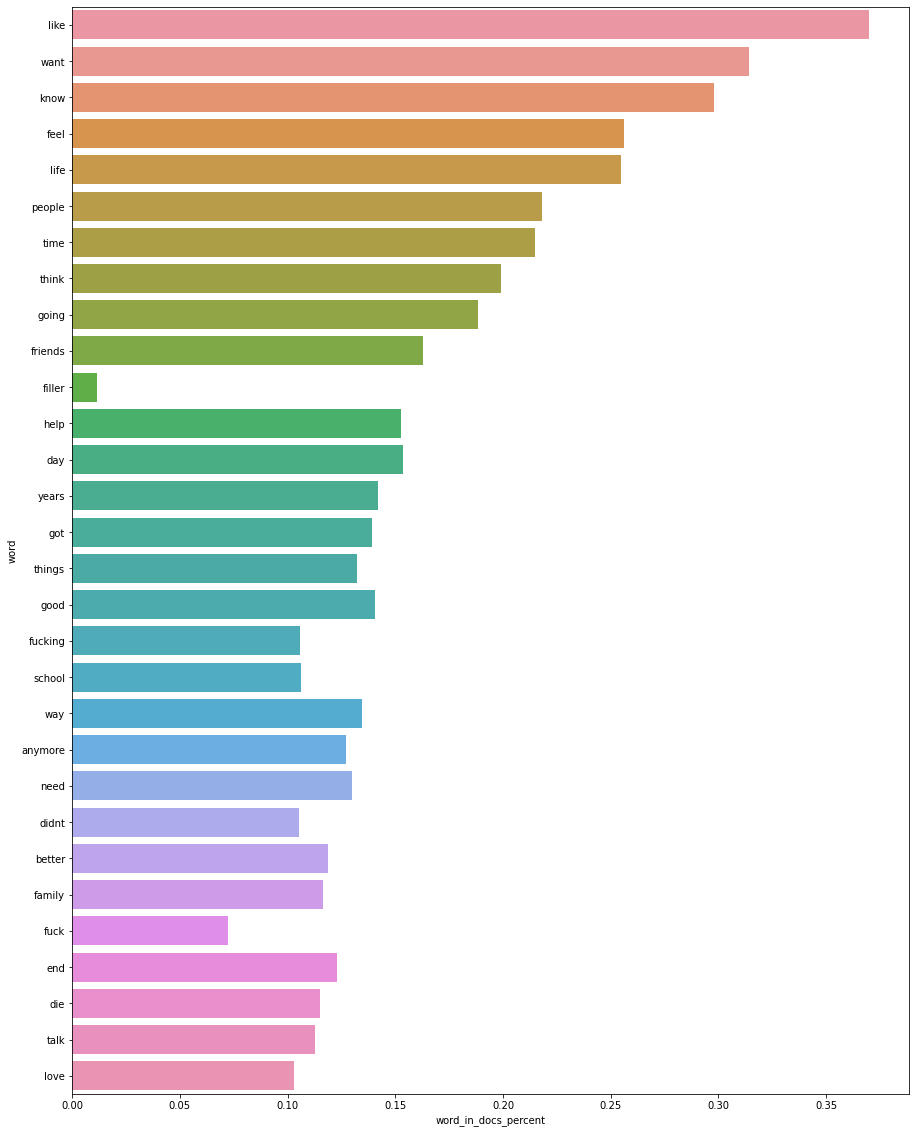

In [214]:
plt.figure(figsize=(15,20))
sns.barplot(x='word_in_docs_percent',y='word',data=wc.iloc[:30])
plt.show()

In [215]:
!pip install squarify

In [216]:
import squarify

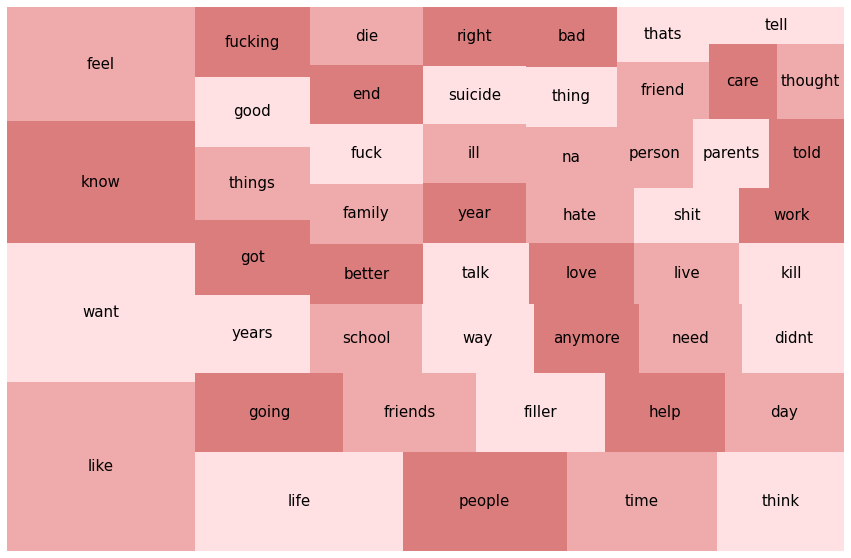

In [220]:
wc_top30 = wc[wc['rank'] <= 50]
some_colors = ['#E57373', '#FFCDD2','#C62828' ]
plt.figure(figsize=(15,10))
squarify.plot(sizes=wc_top30['percent'], label=wc_top30['word'], alpha=0.6, color=some_colors, text_kwargs={'fontsize':15})
plt.axis('off')
plt.show()

In [218]:
from wordcloud import WordCloud

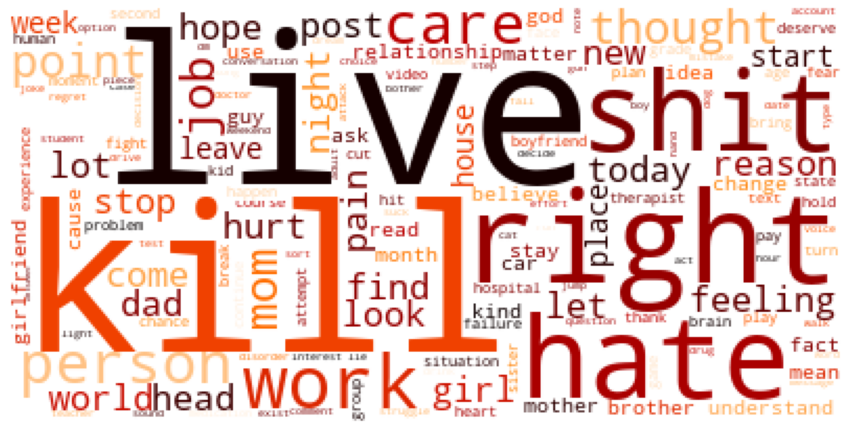

In [232]:
feature_names=wc['word'].values
wcloud=WordCloud(max_words=400, background_color='white',colormap = 'gist_heat')
wcloud.generate(' '.join(word for word in feature_names[30:3000]))
plt.figure(figsize=(15,15))
plt.axis('off')
plt.imshow(wcloud)

## 데이터 정제


## 키워드 추출


## 감성분석